In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

Shape of the dataset: (4500, 2)


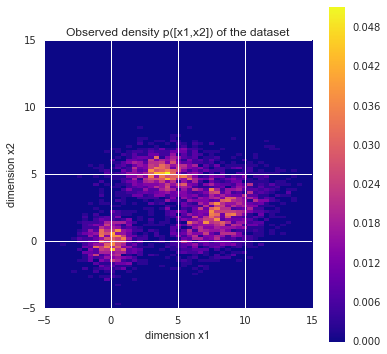

In [26]:
# Mean vector and covariance matrix, cluster 1
N1 = 1000
Mu1  = [0, 0]
Cov1 = [[1, 0], [0, 1]] 
x1, y1 = np.random.multivariate_normal(Mu1, Cov1, (N1,)).T

# Mean vector and covariance matrix, cluster 2
N2 = 1500
Mu2  = [4, 5]
Cov2 = [[3, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(Mu2, Cov2, (N2,)).T

# Mean vector and covariance matrix, cluster 3
N3 = 2000
Mu3  = [8, 2]
Cov3 = [[4, 2], [0, 2]]  
x3, y3 = np.random.multivariate_normal(Mu3, Cov3, (N3,)).T

# Add them all:
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
D = np.array((x,y)).T
print "Shape of the dataset:", D.shape

N = 50
x1 = np.linspace(-5, 15, N)
x2 = np.linspace(-5, 15, 2*N)
H, xedges, yedges = np.histogram2d(D[:,0], D[:,1], bins=(x1,x2), normed=True)
H = H.T  # Let each row list bins with common y range.

fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, 
plt.imshow(H, interpolation='nearest', origin='low', cmap='plasma', extent=[x1[0], x1[-1], x2[0], x2[-1]])
# plt.axis('equal')
plt.xlabel('dimension x1')
plt.ylabel('dimension x2')
plt.title('Observed density p([x1,x2]) of the dataset')
plt.colorbar()

(99, 49)
(50,)
(100,)


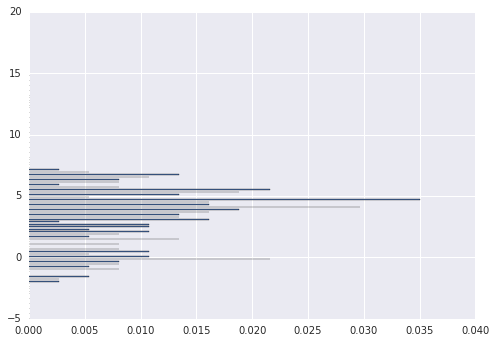

In [73]:
print H.shape # x2,x1
print x1.shape
print x2.shape
# print x1[0:3]
# print xedges[0:3]

# x1_slice = 5.
# ix1 = np.min(np.where(x1>=x1_slice))
# print x1[ix1-1:ix1+1]

# print H[:,ix1].shape
# print x2[0:-1].shape
# plt.figure(dpi=100)
# # plt.plot(x2[0:-1],H[:,ix1])
# plt.barh(x2[0:-1],H[:,ix1],0.05)

# bar(x, height, width, bottom, *, align='center', **kwargs)

def cond_prob(x1_slice,x1,x2,H):
    #     x1_slice = 5.
    ix1 = np.min(np.where(x1>=x1_slice))
    plt.figure(2)
    # plt.plot(x2[0:-1],H[:,ix1])
    plt.barh(x2[0:-1],H[:,ix1],0.05)
#     plt.xlim(-5, 20)
    plt.ylim(-5, 20)
    plt.show()   

x1_slice=5
cond_prob(x1_slice,x1,x2,H)

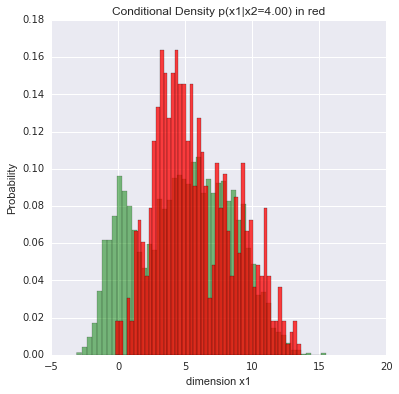

In [5]:
# Select x_2:
dx = 0.5
x_2 = 4
x_range = np.linspace(x_2-dx,x_2+dx,2)

# Slice the dataset along x_2
x_slice = D[np.where( (D[:,1]>=x_range[0]) & (D[:,1]<=x_range[1])),0]
 
# Compute and plot the density
fig = plt.figure(figsize=(6, 6)) 
n, bins, patches = plt.hist(D[:,0], 50, normed=1, facecolor='g', alpha=0.5)
n, bins, patches = plt.hist(x_slice[0,:], 50, normed=1, facecolor='r', alpha=0.75)
plt.xlabel('dimension x1') 
plt.ylabel('Probability')
plt.title("Conditional Density p(x1|x2=%0.2f) in red"%(x_2))
plt.grid(True)
plt.show()

In [2]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [102]:
N = 50
x1 = np.linspace(-5, 15, N)
x2 = np.linspace(-5, 15, N)
H, xedges, yedges = np.histogram2d(D[:,0], D[:,1], bins=(x1,x2), normed=True)
H = H.T  # Let each row list bins with common y range.

def cond_prob0(x1_slice):
    #     x1_slice = 5.
    ix1 = np.min(np.where(x1>=x1_slice))
    plt.figure(2)
    # plt.plot(x2[0:-1],H[:,ix1])
    plt.barh(x2[0:-1],H[:,ix1],0.2)
#     plt.xlim(-5, 20)
    plt.ylim(-5, 20)
    plt.show()   

    
def cond_prob1(x1_slice):
    ix1 = np.min(np.where(x1>=x1_slice))
#     plt.figure(dpi=180,sharey=True)
    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=80, facecolor='w', edgecolor='k', sharey=1)

#     plt.subplot(121)
    plt.imshow(H, interpolation='nearest', origin='low', cmap='plasma', extent=[x1[0], x1[-1], x2[0], x2[-1]])
    # plt.axis('equal')
    plt.ylim(-5, 20)
    plt.vlines(x1_slice,-5,20,colors='w')
    plt.xlabel('dimension x1')
    plt.ylabel('dimension x2')
    plt.title('Observed density p([x1,x2]) of the dataset')
#     plt.colorbar()

    plt.subplot(122)
    plt.barh(x2[0:-1],H[:,ix1],0.2)
    plt.ylim(-5, 20)
    plt.xlabel('')
    plt.ylabel('dimension x2')
    plt.ylabel('Probability')
    plt.title("Conditional Density p(x2|x1=%0.2f) in red"%(x1[ix1]))
    plt.show()   

def cond_prob(x1_slice):
    ix1 = np.min(np.where(x1>=x1_slice))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), facecolor='w', edgecolor='k', sharey=True)

    ax[0].imshow(H, interpolation='nearest', origin='low', cmap='plasma', extent=[x1[0], x1[-1], x2[0], x2[-1]])
    ax[0].grid(False)
    ax[0].set_xlim(-5, 20)
    ax[0].set_ylim(-5, 20)
    ax[0].vlines(x1_slice,-5,20,colors='w')
    ax[0].set_xlabel('dimension x1')
    ax[0].set_ylabel('dimension x2')
    ax[0].set_title('Observed density p([x1,x2]) of the dataset')
#     plt.colorbar()

    ax[1].barh(x2[0:-1],H[:,ix1],0.2,color='r')
    ax[1].set_ylim(-5, 20)
#     ax[1].ylabel('dimension x2')
    ax[1].set_xlabel('Probability')
    ax[1].set_title("Conditional Density p(x2|x1=%0.2f) in red"%(x1[ix1]))
    plt.show()   
    
# x1_slice=5
# cond_prob(x1_slice,x1,x2,H)

interactive_plot = interactive(cond_prob, x1_slice=(np.min(x1), np.max(x1)), \
                               continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

In [112]:
N = 50
x1 = np.linspace(-5, 15, N)
x2 = np.linspace(-5, 15, N)
H, xedges, yedges = np.histogram2d(D[:,0], D[:,1], bins=(x1,x2), normed=True)
H = H.T  # Let each row list bins with common y range.


def cond_prob(x1_slice,x2_slice):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), facecolor='w', edgecolor='k')

    ax[1,0].imshow(H, interpolation='nearest', origin='low', cmap='plasma', extent=[x1[0], x1[-1], x2[0], x2[-1]])
    ax[1,0].grid(False)
    ax[1,0].set_xlim(-5, 20)
    ax[1,0].set_ylim(-5, 20)
    ax[1,0].vlines(x1_slice,-5,20,colors='w')
    ax[1,0].hlines(x2_slice,-5,20,colors='w')
    ax[1,0].set_xlabel('dimension x1')
    ax[1,0].set_ylabel('dimension x2')
    ax[1,0].set_title('Observed density p([x1,x2]) of the dataset')
#     plt.colorbar()

    ix1 = np.min(np.where(x1>=x1_slice))
    ax[1,1].barh(x2[0:-1],H[:,ix1],0.2,color='r')
    ax[1,1].set_ylim(-5, 20)
    ax[1,1].set_xlabel('Probability')
    ax[1,1].set_title("Conditional Density p(x2|x1=%0.2f) in red"%(x1[ix1]))

    ix2 = np.min(np.where(x2>=x2_slice))
    ax[0,0].bar(x1[0:-1],H[ix2,:],0.2,color='r')
    ax[0,0].set_xlim(-5, 20)
    ax[0,0].set_ylabel('Probability')
    ax[0,0].set_title("Conditional Density p(x1|x2=%0.2f) in red"%(x2[ix2]))
    
    ax[0,1].axis('off')
    plt.show()   
    
# x1_slice=5
# cond_prob(x1_slice,x1,x2,H)

interactive_plot = interactive(cond_prob, \
                               x1_slice=(np.min(x1), np.max(x1)), \
                               x2_slice=(np.min(x2), np.max(x2)), \
                               continuous_update=True)
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot